In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_grades.xlsx to student_grades.xlsx


In [3]:
data = pd.read_excel('student_grades.xlsx')

In [4]:
print("Data preview:")
print(data.head())

Data preview:
   StudentID  MathScore  ReadingScore  WritingScore  Absences
0       4256  83.263227     82.293493     81.898504        18
1       8512  23.882421     35.752738      1.337086        11
2       9429  63.417935     17.187991      0.871921         2
3       8463  95.645696     49.224458     77.689992        13
4       7442  57.471098     46.850233     98.486058        16


In [5]:
data_cluster = data[['MathScore', 'ReadingScore', 'WritingScore', 'Absences']]

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

In [7]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

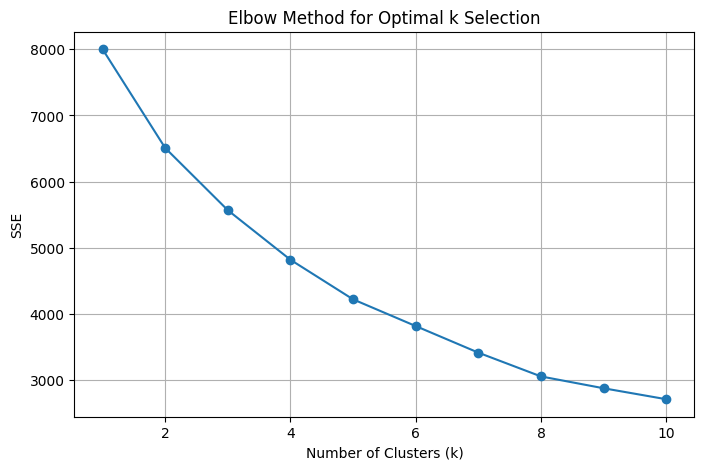

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k Selection')
plt.grid(True)
plt.show()

In [9]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

In [10]:
data['Cluster'] = clusters

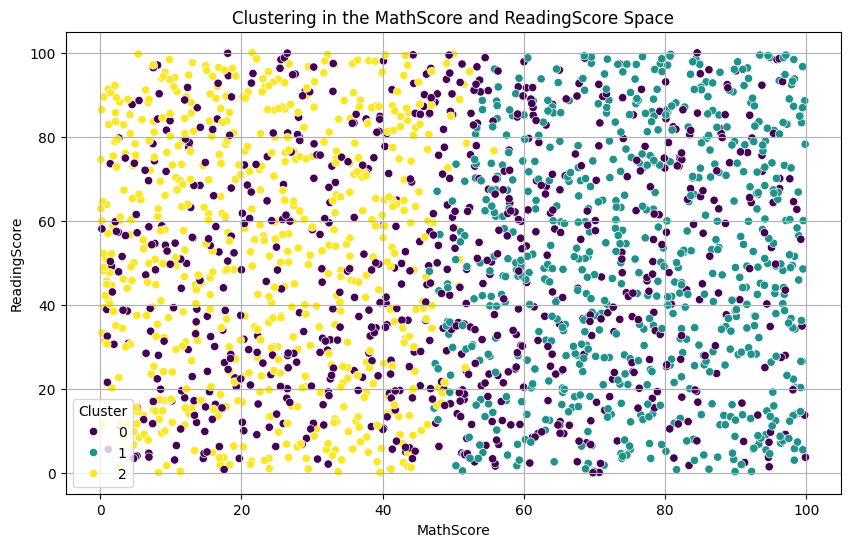

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MathScore', y='ReadingScore', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering in the MathScore and ReadingScore Space')
plt.xlabel('MathScore')
plt.ylabel('ReadingScore')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()